In [21]:
from planet4 import region_data, p4io as io
from pathlib import Path

In [22]:
root = Path('/Users/klay6683/Dropbox/data/planet4/inca_s23_0.5cut_applied/')

In [32]:
fan_fnames = list(root.glob("*_fans_latlons.csv"))

In [33]:
blotch_fnames = list(root.glob("*_blotches_latlons.csv"))

In [23]:
from planet4 import markings

In [35]:
def get_marking(line, cut=0.8):
    data = []
    for marking in ['fan_','blotch_']:
        m = line[line.index.str.startswith(marking)]
        data.append(m.rename_axis(lambda x: x[x.index('_')+1:]))
    fnotch = markings.Fnotch(line.fnotch_value, data[0], data[1])
    return fnotch.get_marking(cut)

In [38]:
def get_final_markings_counts(img_name, cut=0.5):
    d = {}
    d['image_name'] = img_name
    blotch_fname = root / '{}_blotches_latlons.csv'.format(img_name)
    d['n_blotches'] = len(pd.read_csv(str(blotch_fname)))
    fan_fname = root / '{}_fans_latlons.csv'.format(img_name)
    d['n_fans'] = len(pd.read_csv(str(fan_fname)))
    
    return d

In [112]:
get_final_markings_counts('ESP_020115_0985')

{'image_name': 'ESP_020115_0985', 'n_blotches': 1211, 'n_fans': 185}

In [113]:
results = []
from IPython.display import display
from ipywidgets import IntProgress
t = IntProgress(min=0, max=len(region_data.Inca.season2)-1)
display(t)
for i, img_name in enumerate(region_data.Inca.season2):
    t.value = i
    try:
        results.append(get_final_markings_counts(img_name))
    except OSError:
        continue
season2 = pd.DataFrame(results).sort_values(by='image_name')

In [114]:
results = []
from IPython.display import display
from ipywidgets import IntProgress
t = IntProgress(min=0, max=len(region_data.Inca.season3)-1)
display(t)
for i, img_name in enumerate(region_data.Inca.season3):
    t.value = i
    try:
        results.append(get_final_markings_counts(img_name))
    except OSError:
        continue
season3 = pd.DataFrame(results).sort_values(by='image_name')

In [116]:
season2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 14 to 0
Data columns (total 3 columns):
image_name    15 non-null object
n_blotches    15 non-null int64
n_fans        15 non-null int64
dtypes: int64(2), object(1)
memory usage: 480.0+ bytes


In [13]:
%matplotlib inline

In [97]:
metadata = pd.read_csv("/Users/klay6683/Dropbox/data/planet4/P4_10-18-15_H_lat_lng.csv")

In [111]:
metadata

,lat_centered,lng_east,binning,Object_time,solar_longitude,mars_time,north_azimuth,incidence_angle,sub_solar_azimuth,phase_angle,emission_angle,line_pixel_scale,sample_pixel_scale,pixel_resolution,mean_ground_resolution,labelpath,nsamples
HiRISE_image,,,,,,,,,,,,,,,,,
ESP_011296_0975,-82.197,225.253,4,2008-12-23T16:15:26.861,178.833,17.136800,110.5220,88.7496,33.9692,88.6680,0.126506,0.993333,0.993333,0.993333,0.993297,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,25379
ESP_011341_0980,-81.797,76.130,2,2008-12-27T04:25:02.363,180.809,17.105300,110.3550,87.7622,34.8539,87.9902,0.244628,0.493991,0.493991,0.493991,0.494061,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,34338
ESP_011348_0950,-85.043,259.094,4,2008-12-27T17:29:17.706,181.117,18.025900,123.6460,89.5608,33.8052,89.6876,0.155690,0.993521,0.993521,0.993521,0.993234,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,38984
ESP_011350_0945,-85.216,181.415,2,2008-12-27T21:14:01.135,181.205,16.491400,99.7306,87.6506,37.3171,108.1210,24.588300,0.539108,0.539108,0.539108,0.539336,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,17555
ESP_011351_0945,-85.216,181.548,4,2008-12-27T23:05:54.685,181.249,18.316500,127.9650,89.8666,33.8784,86.4021,4.123800,0.989757,0.989757,0.989757,0.990483,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,33247
ESP_011370_0980,-81.925,4.813,2,2008-12-29T10:39:09.516,182.088,17.136800,110.8050,87.3169,34.6865,85.9367,1.664760,0.498336,0.498336,0.498336,0.498381,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,19058
ESP_011394_0935,-86.392,99.068,4,2008-12-31T07:30:26.589,183.150,19.077300,139.4660,89.6666,33.6177,89.6491,0.022776,0.982442,0.982442,0.982442,0.983157,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,33266
ESP_011403_0945,-85.239,181.038,2,2009-01-01T00:21:03.206,183.549,16.934800,106.5850,87.1865,35.9206,102.2180,17.944400,0.516220,0.516220,0.516220,0.516571,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,23127
ESP_011404_0945,-85.236,181.105,4,2009-01-01T02:12:52.786,183.594,18.754300,134.2930,89.4106,33.8896,81.4188,9.519270,0.999692,0.999692,0.999692,1.000340,/Users/klay6683/Dropbox/data/hirise/labels/ESP...,37878


In [44]:
from hirise.hirise_tools import get_rdr_label, labels_root

In [119]:
import pvl
def get_nlines_from_label(labelfname):
    module = pvl.load(str(labelfname))
    return module['UNCOMPRESSED_FILE']['IMAGE']['LINE_SAMPLES']

In [120]:
p = labels_root()

In [98]:
metadata['labelpath'] = metadata.HiRISE_image.map(lambda x: p / (x + '_RED.LBL'))

In [99]:
metadata['nsamples'] = metadata.labelpath.map(get_nlines_from_label)

In [123]:
metadata.set_index('HiRISE_image', inplace=True)

KeyError: 'HiRISE_image'

In [124]:
season2.set_index('image_name', inplace=True)
season3.set_index('image_name', inplace=True)

In [125]:
season2 = season2.join(metadata['solar_longitude binning nsamples'.split()])

In [126]:
season3 = season3.join(metadata['solar_longitude binning nsamples'.split()])

In [128]:
season2.set_index('solar_longitude', inplace=True)

In [129]:
season3.set_index('solar_longitude', inplace=True)

In [131]:
season2['both'] = season2.n_blotches + season2.n_fans

In [132]:
season3['both'] = season3.n_blotches + season3.n_fans

In [143]:
season2['scaled'] = season2.both / season2.nsamples / season2.binning

In [144]:
season3['scaled'] = season3.both / season3.nsamples / season3.binning

In [137]:
%matplotlib notebook
import seaborn as sns
sns.set()

<IPython.core.display.Javascript object>


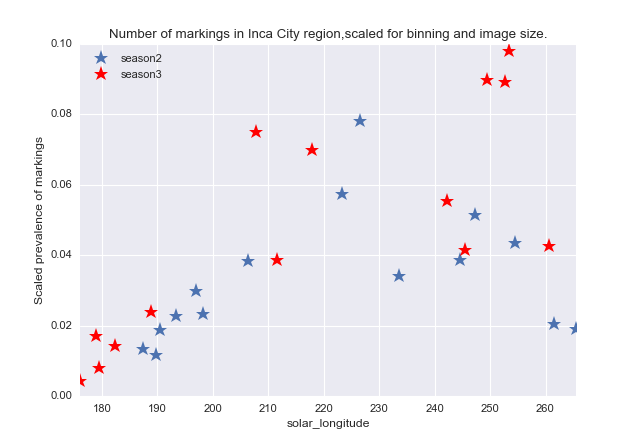

In [154]:
season2.scaled.plot(style='*', ms=14, 
                    xlim=(season3.index.min(), season3.index.max()), label='season2')
season3.scaled.plot(style='*', color='red', label='season3', ms=14)
plt.legend(loc='best')
plt.ylabel('Scaled prevalence of markings')
plt.title("Number of markings in Inca City region,scaled for binning and image size.")
plt.savefig('/Users/klay6683/Desktop/inca_s23.pdf')

In [150]:
season2

,n_blotches,n_fans,binning,nsamples,both,scaled
solar_longitude,,,,,,
187.478,1522,343,2,70415,1865,0.013243
189.865,633,194,2,35322,827,0.011707
190.453,996,254,2,33310,1250,0.018763
193.452,954,439,2,30651,1393,0.022724
197.073,1859,599,2,41019,2458,0.029962
198.318,1525,795,2,49747,2320,0.023318
206.291,1822,1314,2,40748,3136,0.038480
223.314,1499,1438,1,51209,2937,0.057353
226.522,2111,1099,1,41042,3210,0.078213


In [148]:
season3

,n_blotches,n_fans,binning,nsamples,both,scaled
solar_longitude,,,,,,
176.075,348,89,4,25352,437,0.004309
178.951,1211,185,2,40716,1396,0.017143
179.521,701,103,2,51314,804,0.007834
182.428,925,248,2,41025,1173,0.014296
188.901,1961,462,2,50896,2423,0.023803
207.777,1704,1384,1,41239,3088,0.074881
211.519,572,287,2,11120,859,0.038624
217.831,1312,870,1,31234,2182,0.069860
242.299,1280,740,1,36392,2020,0.055507


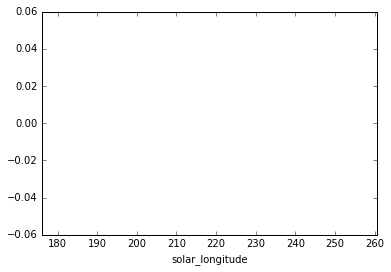

In [94]:
season3.scaled.plot()